<a href="https://colab.research.google.com/github/cratic/book-resources/blob/master/KDDNSL_dense_adam_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Std Libraries & Options & Parameters

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import tensorflow as ts
np.random.seed(1000)
##parameters
size_batch = 32; epochs = 150;
#accesibility options
#print without print(.)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#!jupyter nbextension enable highlight_selected_word/highlight_selected_word
#alternative:from IPython.display import display; display(size_batch)
#remove predict column
removelabel = 'labels43' ##labels43:binary, labels44:5-Dim, labels42:originals

# Input Data & Overview

In [0]:
#import from googleDrive
from google.colab import drive
drive.mount('/content/gdrive', 
            force_remount=True)
!ls "/content/gdrive/My Drive/data/nslkdd"

Mounted at /content/gdrive
'field names.txt'   KDDTest+.txt        KDDTrain+.txt
 KDDTest-21.txt     KDDTrain+_20P.txt


In [0]:
train = pd.read_csv('/content/gdrive/My Drive/data/nslkdd/KDDTrain+.txt', 
                    sep = ',', 
                    index_col = False)
test = pd.read_csv('/content/gdrive/My Drive/data/nslkdd/KDDTest+.txt', 
                   sep = ',', 
                   index_col = False)
train.head(4)
#columns 2-3-4 needs to be converted to categorical
#Range of data values(numerical)
train.describe()

print(" \n Training Labels \n");
train['labels42'].value_counts()
print(" \n Test Labels \n");
test['labels42'].value_counts()
#number of classes
print("\n Number of categories in training:")
len(train['labels42'].value_counts())
print("\n Number of categories in test:")
len(test['labels42'].value_counts())
print(" \n Number of test classes:", len(test['labels42'].value_counts()))
print(" \n Number of train classes:", len(train['labels42'].value_counts()))

,duration1,protocol_type2,service3,flag4,src_bytes5,dst_bytes6,land7,wrong_fragment8,urgent9,hot10,...,dst_host_srv_count33,dst_host_same_srv_rate34,dst_host_diff_srv_rate35,dst_host_same_src_port_rate36,dst_host_srv_diff_host_rate37,dst_host_serror_rate38,dst_host_srv_serror_rate39,dst_host_rerror_rate40,dst_host_srv_rerror_rate41,labels42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal


,duration1,src_bytes5,dst_bytes6,land7,wrong_fragment8,urgent9,hot10,num_failed_logins11,logged_in12,num_compromised13,...,dst_host_count32,dst_host_srv_count33,dst_host_same_srv_rate34,dst_host_diff_srv_rate35,dst_host_same_src_port_rate36,dst_host_srv_diff_host_rate37,dst_host_serror_rate38,dst_host_srv_serror_rate39,dst_host_rerror_rate40,dst_host_srv_rerror_rate41
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 
 Training Labels 



normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels42, dtype: int64

 
 Test Labels 



normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
perl                  2
udpstorm              2
phf                   2
worm                  2
sqlattack             2
imap                  1
Name: labels42, dtype: int64


 Number of categories in training:


23


 Number of categories in test:


38

 
 Number of test classes: 38
 
 Number of train classes: 23


# Label Dimension Reduction

## Binary Labels
 Attack-Normal

In [0]:
train['labels43'] = np.where(train['labels42'] != 'normal', 'attack', 
                             train['labels42'])
test['labels43'] = np.where(test['labels42'] != 'normal', 'attack', 
                            test['labels42'])
print("Binary training labels\n"); train['labels43'].value_counts();
print("Binary test labels\n"); test['labels43'].value_counts()
#beware dtype:int64
print("\n Number of test classes:", len(test['labels42'].value_counts()))
print("\n Number of train classes:", len(train['labels42'].value_counts()))

Binary training labels



normal    67343
attack    58630
Name: labels43, dtype: int64

Binary test labels



attack    12833
normal     9711
Name: labels43, dtype: int64


 Number of test classes: 38

 Number of train classes: 23


## 5-Dim Labels
Normal-Probing-DOS-R2L-U2R

In [0]:
####REDUCE LABELS with normal-DDoS-Probing-r2l-u2r
train['labels44'] = np.where(train['labels42'] == 'normal', 'normal', train['labels42'])
train['labels44'] = np.where(train['labels42'] == 'back', 'DDoS', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'land', 'DDoS', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'neptune', 'DDoS', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'pod', 'DDoS', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'smurf', 'DDoS', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'teardrop', 'DDoS', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'mailbomb', 'DDoS', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'apache2', 'DDoS', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'processtable', 'DDoS', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'udpstorm', 'DDoS', train['labels44'])

train['labels44'] = np.where(train['labels42'] == 'ipsweep', 'Probing', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'nmap', 'Probing', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'portsweep', 'Probing', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'satan', 'Probing', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'mscan', 'Probing', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'saint', 'Probing', train['labels44'])

train['labels44'] = np.where(train['labels42'] == 'ftp_write', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'guess_passwd', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'imap', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'multihop', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'phf', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'spy', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'warezclient', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'warezmaster', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'sendmail', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'named', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'snmpgetattack', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'snmpguess', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'xlock', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'xsnoop', 'r2l', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'worm', 'r2l', train['labels44'])

train['labels44'] = np.where(train['labels42'] == 'buffer_overflow', 'u2r', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'loadmodule', 'u2r', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'perl', 'u2r', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'rootkit', 'u2r', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'httptunnel', 'u2r', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'ps', 'u2r', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'sqlattack', 'u2r', train['labels44'])
train['labels44'] = np.where(train['labels42'] == 'xterm', 'u2r', train['labels44'])
####test - REDUCE LABELS with normal-DDoS-Probing-r2l-u2r
test['labels44'] = np.where(test['labels42'] == "normal", "normal", test['labels42'])
test['labels44'] = np.where(test['labels42'] == "back", "DDoS", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "land", "DDoS", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "neptune", "DDoS", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "pod", "DDoS", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "smurf", "DDoS", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "teardrop", "DDoS", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "mailbomb", "DDoS", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "apache2", "DDoS", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "processtable", "DDoS", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "udpstorm", "DDoS", test['labels44'])

test['labels44'] = np.where(test['labels42'] == "ipsweep", "Probing", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "nmap", "Probing", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "portsweep", "Probing", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "satan", "Probing", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "mscan", "Probing", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "saint", "Probing", test['labels44'])

test['labels44'] = np.where(test['labels42'] == "ftp_write", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "guess_passwd", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "imap", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "multihop", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "phf", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "spy", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "warezclient", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "warezmaster", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "sendmail", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "named", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "snmpgetattack", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "snmpguess", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "xlock", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "xsnoop", "r2l", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "worm", "r2l", test['labels44'])

test['labels44'] = np.where(test['labels42'] == "buffer_overflow", "u2r", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "loadmodule", "u2r", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "perl", "u2r", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "rootkit", "u2r", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "httptunnel", "u2r", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "ps", "u2r", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "sqlattack", "u2r", test['labels44'])
test['labels44'] = np.where(test['labels42'] == "xterm", "u2r", test['labels44'])

In [0]:
print(" Multi-Category test set\n");
print("Number of classes:", len(test['labels44'].value_counts()))
test['labels44'].value_counts()
print("\n Multi-Category training set\n");
print("Number of classes:", len(train['labels44'].value_counts()))
train['labels44'].value_counts()

 Multi-Category test set

Number of classes: 5


normal     9711
DDoS       7458
r2l        2754
Probing    2421
u2r         200
Name: labels44, dtype: int64


 Multi-Category training set

Number of classes: 5


normal     67343
DDoS       45927
Probing    11656
r2l          995
u2r           52
Name: labels44, dtype: int64

In [0]:
#***UPDATE:remove by attack type since test and training has highly uneven distribution of original labels
#Removing classes with low sample size
#iglist = ['u2r', 'r2l']
#train = train[~train['labels44'].isin(iglist) ]
#test = test[~test['labels44'].isin(iglist) ]
##UPDATE: select label to process
#print("\n Training labels after reduction \n")
#print(train['labels43'].value_counts())
#print("\n Test labels after reduction \n")
#print(test['labels43'].value_counts())

# Encoding Labels

In [0]:
#encode objects to numerical
obj_train = train.select_dtypes(include=['object']).copy()
obj_train.head()

,protocol_type2,service3,flag4,labels42,labels43,labels44
0,tcp,ftp_data,SF,normal,normal,normal
1,udp,other,SF,normal,normal,normal
2,tcp,private,S0,neptune,attack,DDoS
3,tcp,http,SF,normal,normal,normal
4,tcp,http,SF,normal,normal,normal


In [0]:
#Remove original label and 'removelabel'(in options)
train.drop(['labels42'], axis=1, inplace = True)
train.drop(removelabel, axis=1, inplace = True)
test.drop(['labels42'], axis=1, inplace = True)
test.drop(removelabel, axis=1, inplace = True)
train.head()

,duration1,protocol_type2,service3,flag4,src_bytes5,dst_bytes6,land7,wrong_fragment8,urgent9,hot10,...,dst_host_srv_count33,dst_host_same_srv_rate34,dst_host_diff_srv_rate35,dst_host_same_src_port_rate36,dst_host_srv_diff_host_rate37,dst_host_serror_rate38,dst_host_srv_serror_rate39,dst_host_rerror_rate40,dst_host_srv_rerror_rate41,labels44
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DDoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [0]:
#train.head(2)
#train['labels44'].value_counts()
#train['protocol_type2'].value_counts()
#train['service3'].value_counts()
#train['flag4'].value_counts()
#len(train['labels44'].value_counts())
#list(train['labels44'])

In [0]:
#LabelEncoder
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
for column in train.columns:
  if train[column].dtype == type(object):
    temptr = lb.fit_transform(train[column])
    temptr = pd.DataFrame(temptr,
                          columns=lb.classes_)
    train = pd.concat([train, temptr], axis = 1)
    train.drop(column,
               axis=1,
               inplace=True)
    #test
    tempte = lb.fit_transform(test[column])
    tempte = pd.DataFrame(tempte,
                          columns=lb.classes_)
    test = pd.concat([test, tempte], axis = 1)
    test.drop(column,
              axis=1,
              inplace=True)
    
train.head(2)
test.head(2)

,duration1,src_bytes5,dst_bytes6,land7,wrong_fragment8,urgent9,hot10,num_failed_logins11,logged_in12,num_compromised13,...,S1,S2,S3,SF,SH,DDoS,Probing,normal,r2l,u2r
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


,duration1,src_bytes5,dst_bytes6,land7,wrong_fragment8,urgent9,hot10,num_failed_logins11,logged_in12,num_compromised13,...,S1,S2,S3,SF,SH,DDoS,Probing,normal,r2l,u2r
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [0]:
#test and train dimensions different bcs train includes 6 different services
set(list(train)) ^ set(list(test))
diff = set(list(train)) ^ set(list(test))
#add "0" services to test set
#####LEARN HASHING NaturalLanguageProcessing

test = test.assign(aol = pd.Series(np.zeros(len(test))))
test = test.assign(harvest = pd.Series(np.zeros(len(test))))
test = test.assign(http_2784 = pd.Series(np.zeros(len(test))))
test = test.assign(http_8001 = pd.Series(np.zeros(len(test))))
test = test.assign(red_i = pd.Series(np.zeros(len(test))))
test = test.assign(urh_i = pd.Series(np.zeros(len(test))))

print("\n Check dimensions")
set(list(train)) ^ set(list(test))

orderlist = list(train)
test = test[orderlist]
#orderlist[38:122]

train.head(2)
test.head(2)

{'aol', 'harvest', 'http_2784', 'http_8001', 'red_i', 'urh_i'}


 Check dimensions


set()

,duration1,src_bytes5,dst_bytes6,land7,wrong_fragment8,urgent9,hot10,num_failed_logins11,logged_in12,num_compromised13,...,S1,S2,S3,SF,SH,DDoS,Probing,normal,r2l,u2r
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


,duration1,src_bytes5,dst_bytes6,land7,wrong_fragment8,urgent9,hot10,num_failed_logins11,logged_in12,num_compromised13,...,S1,S2,S3,SF,SH,DDoS,Probing,normal,r2l,u2r
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Normalize & Split InputFeatures - OutputCategories

In [0]:
from sklearn.preprocessing import Normalizer
from keras.utils.np_utils import to_categorical

trainy = train.iloc[:, 122:127]
testy = test.iloc[:, 122:127]
trainx = train.iloc[:, 0:122]
testx = test.iloc[:, 0:122]
#Normalizer does not normalize one_hot^^
scaler = Normalizer()

#one_hot values
#trainx.iloc[:, 38:122] = trainx.iloc[:, 38:122]
#testx.iloc[:, 38:122] = testx.iloc[:, 38:122]

train_x = scaler.fit_transform(trainx)
test_x = scaler.fit_transform(testx)
##keras requires np.array
train_y = trainy.values
test_y = testy.values

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

# sequential network
NN_model = Sequential()
#input layer
NN_model.add(Dropout(0.1))
layer1 = NN_model.add(Dense(768, input_dim = 122, activation='relu'))
#hidden layers
NN_model.add(Dropout(0.2))
layer2 = NN_model.add(Dense(1024, activation='relu'))
NN_model.add(Dropout(0.2))
layer2 = NN_model.add(Dense(1536, activation='relu'))
NN_model.add(Dropout(0.3))
layer3 = NN_model.add(Dense(2048, activation='relu'))
NN_model.add(Dropout(0.4))
#output layer
layerout = NN_model.add(Dense(5))
#output layer activation
NN_model.add(Activation('softmax'))

adamm = optimizers.Adam(lr=0.0001,
                        decay=0.0001)

NN_model.compile(loss='categorical_crossentropy', 
                 optimizer=adamm, 
                 metrics=['categorical_accuracy'])#categorical_accuracy

callbacks = EarlyStopping(monitor='val_loss',
                         min_delta=0.0001,
                         patience=50,
                         verbose=0, 
                         mode='auto')

checkpoint = ModelCheckpoint(filepath="./checkpoint-{epoch:02d}.hdf5", 
                             verbose=1, 
                             save_best_only=True, 
                             monitor='val_loss')

In [0]:
history = NN_model.fit(train_x, 
                       train_y, 
                       validation_data=(test_x, test_y), 
                       batch_size=size_batch, 
                       epochs=epochs, 
                       callbacks=[callbacks, checkpoint])

NN_model.save("./best_only_model.hdf5")

Train on 125973 samples, validate on 22544 samples
Epoch 1/150
125973/125973 [==============================] - 50s 398us/step - loss: 0.2451 - categorical_accuracy: 0.9199 - val_loss: 1.4535 - val_categorical_accuracy: 0.7134

Epoch 00001: val_loss improved from inf to 1.45347, saving model to ./checkpoint-01.hdf5
Epoch 2/150
125973/125973 [==============================] - 48s 385us/step - loss: 0.1396 - categorical_accuracy: 0.9546 - val_loss: 1.3927 - val_categorical_accuracy: 0.7357

Epoch 00002: val_loss improved from 1.45347 to 1.39273, saving model to ./checkpoint-02.hdf5
Epoch 3/150
125973/125973 [==============================] - 49s 386us/step - loss: 0.1123 - categorical_accuracy: 0.9639 - val_loss: 1.5966 - val_categorical_accuracy: 0.7374

Epoch 00003: val_loss did not improve from 1.39273
Epoch 4/150
125973/125973 [==============================] - 48s 382us/step - loss: 0.0986 - categorical_accuracy: 0.9693 - val_loss: 1.5206 - val_categorical_accuracy: 0.7399

Epoch 00

In [0]:
weights_file = './best_only_model.hdf5' # save best checkpoint
NN_model.load_weights(weights_file) # load best checkpoint

In [0]:
from keras import metrics
from sklearn.metrics import accuracy_score

predictions = NN_model.predict(test_x)
score = accuracy_score(test_y, predictions.round())
print(score)

0.7439229950319376


Text(0.5, 0, 'Epochs')

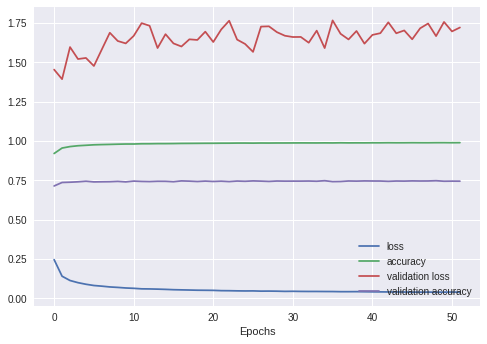

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['categorical_accuracy'], label = "accuracy")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.plot(history.history['val_categorical_accuracy'], label = "validation accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.show()

Test Set Classification Report
              precision    recall  f1-score   support

     probing       0.95      0.78      0.85      7458
      normal       0.88      0.59      0.70      2421
         dos       0.65      0.98      0.78      9711
         r2l       0.31      0.02      0.04      2754
         u2l       0.00      0.00      0.00       200

   micro avg       0.74      0.74      0.74     22544
   macro avg       0.56      0.47      0.48     22544
weighted avg       0.72      0.74      0.70     22544

Test Set Accuracy Score : 0.7440117104329311
[[5819    7 1502  130    0]
 [ 290 1417  714    0    0]
 [  44  188 9476    3    0]
 [   1    1 2691   61    0]
 [   0    0  197    3    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 576x396 with 0 Axes>

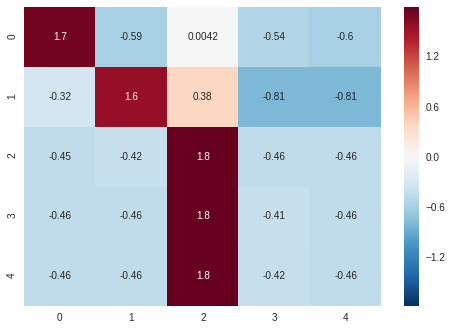

In [0]:
predict_y = NN_model.predict_classes(test_x)

pre_y = pd.DataFrame(data = predict_y)
tst_y = pd.DataFrame(data = test_y)
trn_y = pd.DataFrame(data = train_y)

from numpy import argmax
from sklearn.preprocessing import normalize
from sklearn import metrics

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

tst_y = one_hot_decode(test_y)
trn_y = one_hot_decode(train_y)

print('Test Set Classification Report')
class_names = ['probing', 'normal', 'dos', 'r2l', 'u2l']
print(classification_report(tst_y, pre_y, target_names=class_names))
print('Test Set Accuracy Score :', metrics.accuracy_score(tst_y, pre_y))

cnf = confusion_matrix(tst_y, pre_y)
print(cnf)
import seaborn as sn
df_cnf = pd.DataFrame(data = cnf)
df_norm_cnf=df_cnf.sub(df_cnf.mean(axis=1), axis=0)
df_norm_cnf=df_norm_cnf.div( df_cnf.std(axis=1), axis=0 )

plt.figure()
sn.heatmap(df_norm_cnf, annot=True,annot_kws={"size": 10})# font size

Training Set Classification Report
              precision    recall  f1-score   support

     probing       1.00      1.00      1.00     45927
      normal       1.00      0.97      0.98     11656
         dos       0.99      1.00      0.99     67343
         r2l       0.94      0.81      0.87       995
         u2l       0.00      0.00      0.00        52

   micro avg       0.99      0.99      0.99    125973
   macro avg       0.78      0.75      0.77    125973
weighted avg       0.99      0.99      0.99    125973

Training Set Accuracy Score : 0.9936891238598747


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[45811     1   114     1     0]
 [   34 11328   294     0     0]
 [   33    22 67236    52     0]
 [    0     0   192   803     0]
 [    0     0    52     0     0]]


<Figure size 576x396 with 0 Axes>

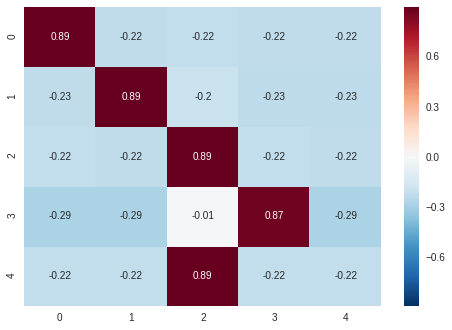

In [0]:
predict_y = NN_model.predict_classes(train_x)
pre_y_tr = pd.DataFrame(data = predict_y)
trn_y = pd.DataFrame(data = train_y)

from numpy import argmax
from sklearn.preprocessing import normalize
from sklearn import metrics

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

trn_y = one_hot_decode(train_y)

print('Training Set Classification Report')
class_names = ['probing', 'normal','dos', 'r2l', 'u2l']
print(classification_report(trn_y, pre_y_tr, target_names=class_names))
print('Training Set Accuracy Score :', metrics.accuracy_score(trn_y, pre_y_tr))

cnf = confusion_matrix(trn_y, pre_y_tr)
print(cnf)
import seaborn as sn
df_cnf = pd.DataFrame(data = cnf)
df_norm_cnf=df_cnf.sub(df_cnf.mean(axis=1), axis=0)
df_norm_cnf=df_norm_cnf.div( df_cnf.std(axis=1), axis=0 )/2

plt.figure()
sn.heatmap(df_norm_cnf, annot=True,annot_kws={"size": 10})# font size

In [0]:
#LabelEncoder
#from sklearn.preprocessing import LabelEncoder
#from keras.utils import to_categorical
#label_encoder = LabelEncoder()

#for column in train.columns:
#  if train[column].dtype == type(object):
 #   train[column] = label_encoder.fit_transform(train[column])
 #   temptr = pd.get_dummies(train[column],
 #                           prefix = column,
 #                           columns = train[column])
 #   train = pd.concat([train, temptr], axis = 1)
 #   train.drop(column,
 #              axis=1,
 #              inplace=True)
 #   #test
 #   test[column] = label_encoder.fit_transform(test[column])
 #   tempte = pd.get_dummies(test[column],
 #                           prefix = column,
 #                           columns = test[column])
 #   test = pd.concat([test, tempte], axis = 1)
 #   test.drop(column,
 #             axis=1,
 #             inplace=True)
#list(train)
#list(test)
    #use inverse transform after training: inverse_transform(y)
    #inverse transform for keras!?!?